# Assignment 1 Homework 3
## This is a skeleton & instruction notebook
- GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), ## all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
- Describe the behavior you see in the plots in terms of the law of large numbers.
- PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing ## Extra Credit: FIT a gaussian to the distribution of means

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
#import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
# naming distributions and creating empty dictionaryes inside dictionary md
distributions = ['Poisson', 'Gauss', 'ChiSquare', 'Logistic', 'Binomial']
md = {}
for dist in distributions:
    md[dist] = {}

In [24]:
md

{'Binomial': {}, 'ChiSquare': {}, 'Gauss': {}, 'Logistic': {}, 'Poisson': {}}

In [25]:
mymean = 100
df = mymean

In [27]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


In [ ]:
np.random.seed(369)

In [28]:
# Creating 100 different random distributions with different sizes to each distribution
#'pois', 'gaus', 'chisq', 'cauchy', 'binomial'
for n in mysize:
    md['ChiSquare'][n] = np.random.chisquare(df, size = n)
    md['Poisson'][n] = np.random.poisson(lam = df, size = n)
    md['Gauss'][n] = np.random.normal(loc=df, scale=1.0, size=n)
    md['Binomial'][n] = np.random.binomial(df, 0.5, size = n)
    md['Logistic'][n] = np.random.logistic(loc = df, scale = 1.0, size=n)

In [29]:
# Calculating means for all distributions
for dist in distributions:
    md[dist]['means'] = {}
    for nn in md[dist]:
        if not type(nn) == str:
            md[dist]['means'][nn] = md[dist][nn].mean()

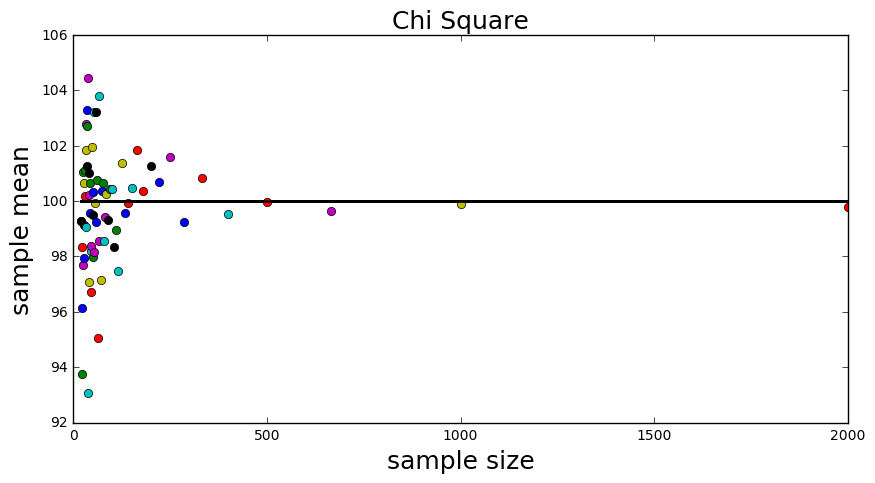

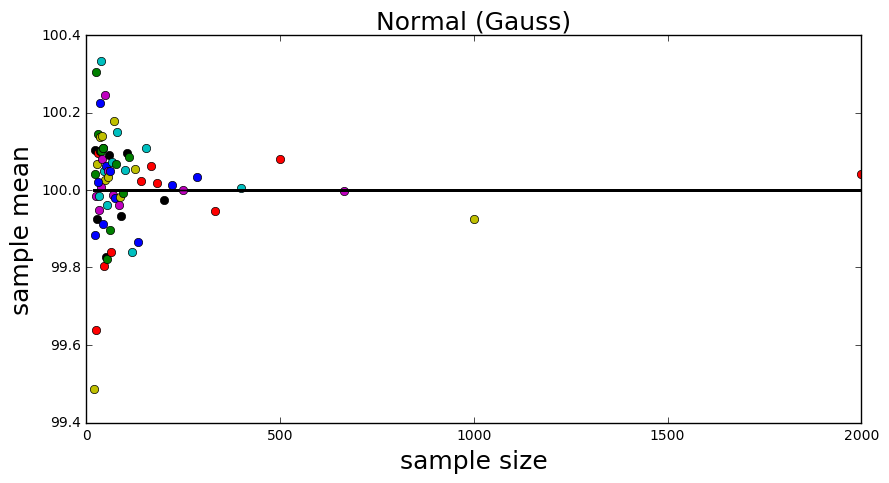

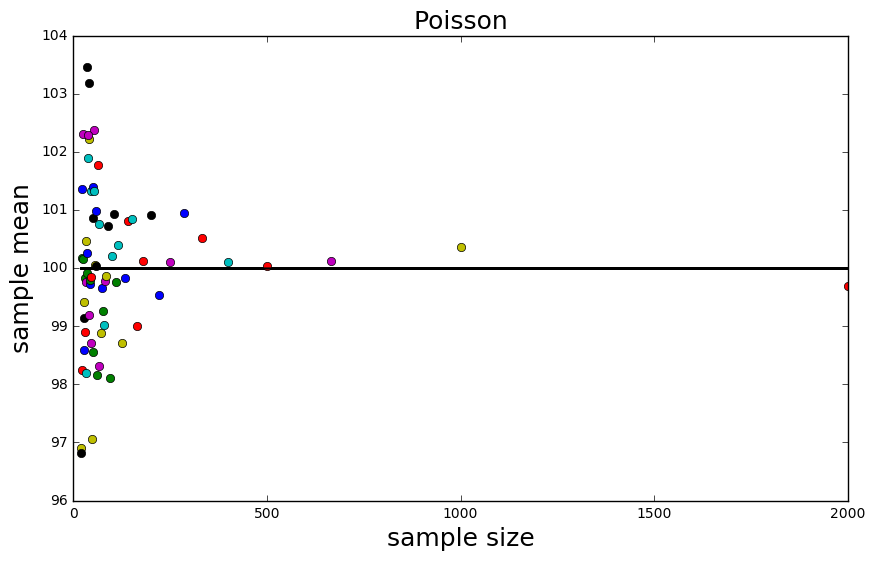

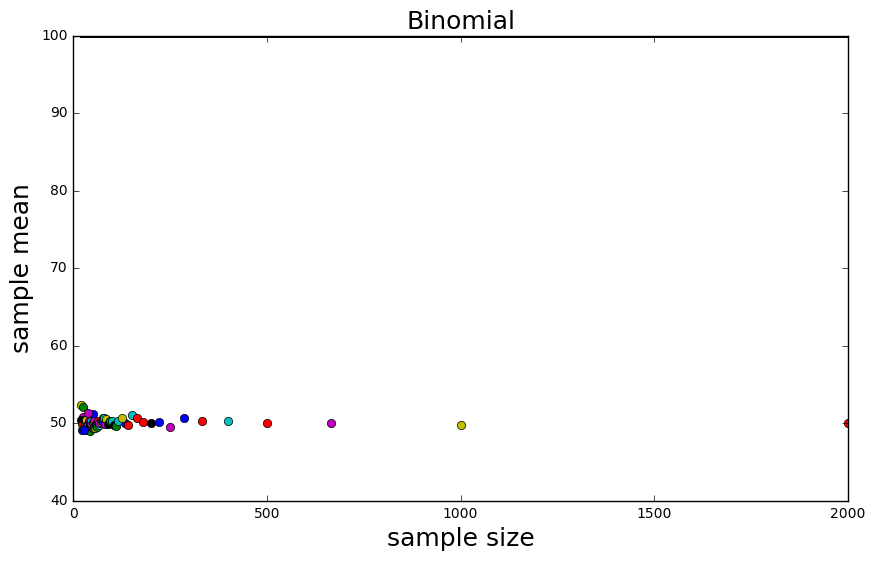

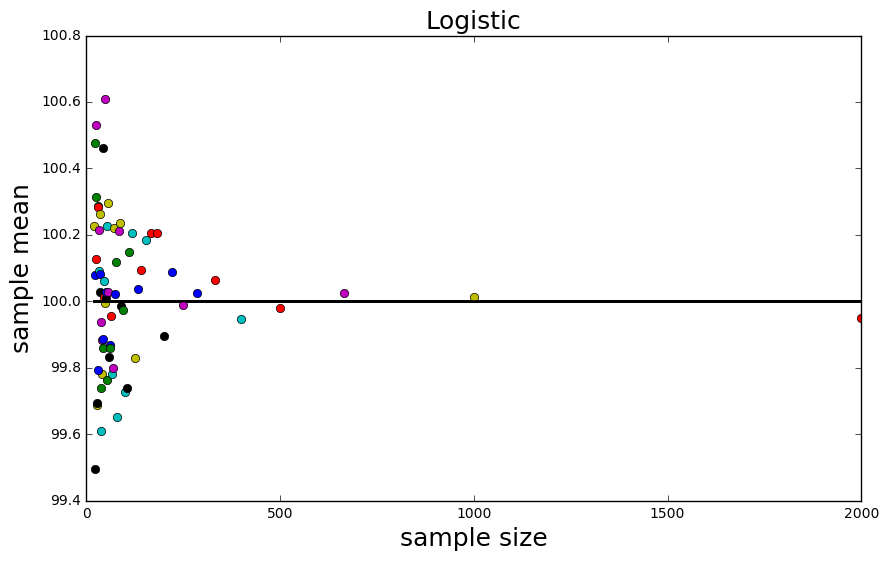

In [31]:
axchisq_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
axgauss_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for dist in distributions:
    if dist == 'ChiSquare':
        for nn in md[dist]:
            if not type(nn) == str:
                axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axchisq_mu_n.set_xlabel('sample size', fontsize=18)
                axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
                axchisq_mu_n.set_title('Chi Square', fontsize=18)
                axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Poisson':
        for nn in md[dist]:
            if not type(nn) == str:
                axpoisson_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
                axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
                axpoisson_mu_n.set_title('Poisson', fontsize=18)
                axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Gauss':
        for nn in md[dist]:
            if not type(nn) == str:
                axgauss_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axgauss_mu_n.set_xlabel('sample size', fontsize=18)
                axgauss_mu_n.set_ylabel('sample mean', fontsize=18)
                axgauss_mu_n.set_title('Normal (Gauss)', fontsize=18)
                axgauss_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Binomial':
        for nn in md[dist]:
            if not type(nn) == str:
                axbinomial_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
                axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
                axbinomial_mu_n.set_title('Binomial', fontsize=18)
                axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Logistic':
        for nn in md[dist]:
            if not type(nn) == str:
                axlogistic_mu_n.plot(nn, md[dist]['means'][nn], 'o')
                axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
                axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
                axlogistic_mu_n.set_title('Logistic', fontsize=18)
                axlogistic_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

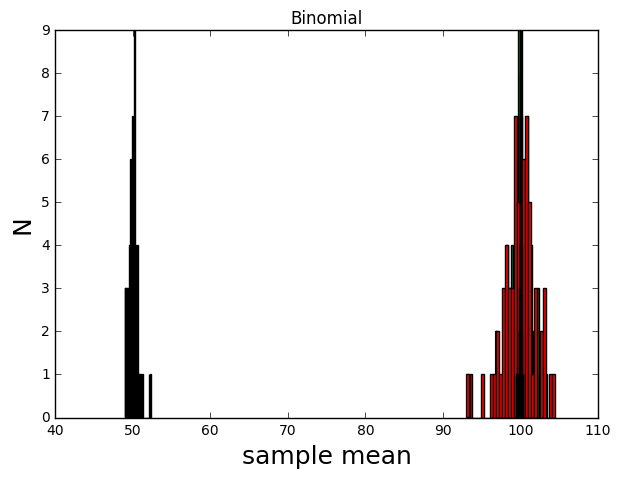

In [34]:
# Plotting it all together as histograms
Poisson = list(md['Poisson']['means'].values())
Gauss = list(md['Gauss']['means'].values())
ChiSquare = list(md['ChiSquare']['means'].values())
Binomial = list(md['Binomial']['means'].values())
Logistic = list(md['Logistic']['means'].values())

pl.figure(figsize=(7, 5))
pl.hist(Logistic,bins=30)
pl.hist(Poisson,bins=30)
pl.hist(ChiSquare,bins=30)
pl.hist(Binomial,bins=30)
pl.hist(Gauss,bins=30)
pl.title(dist)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

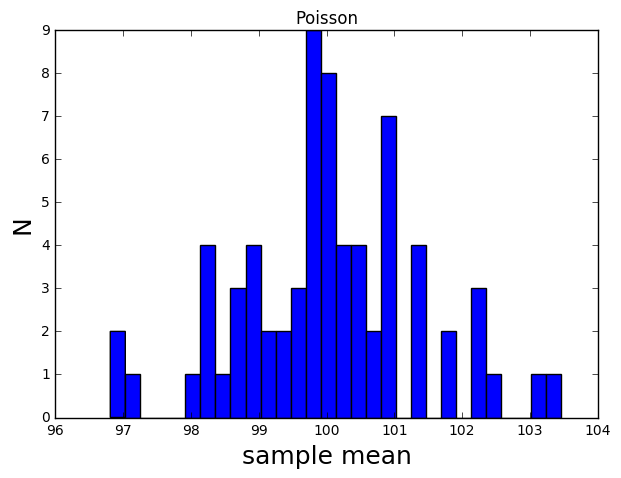

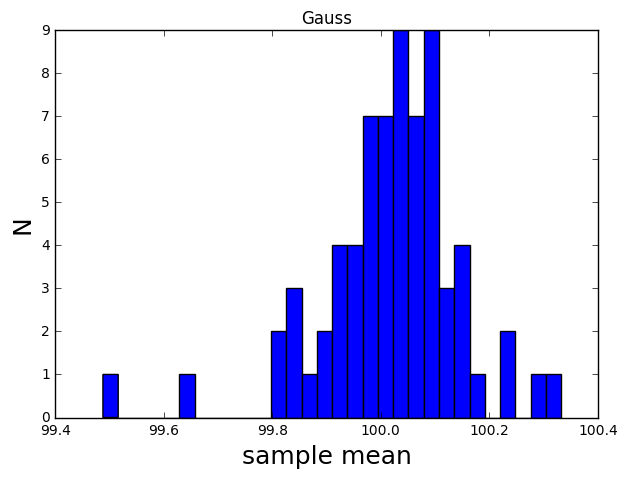

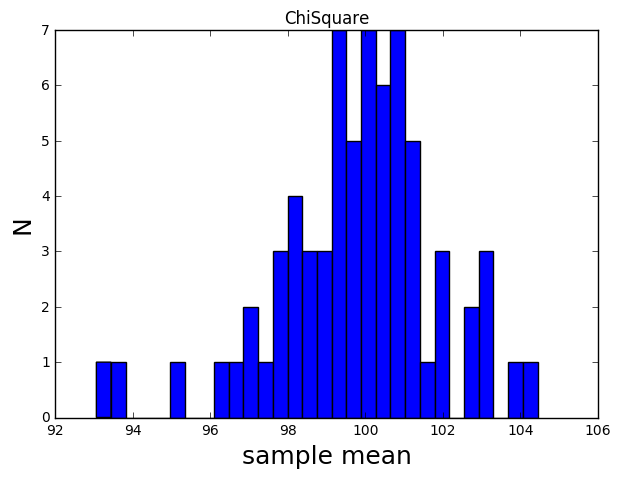

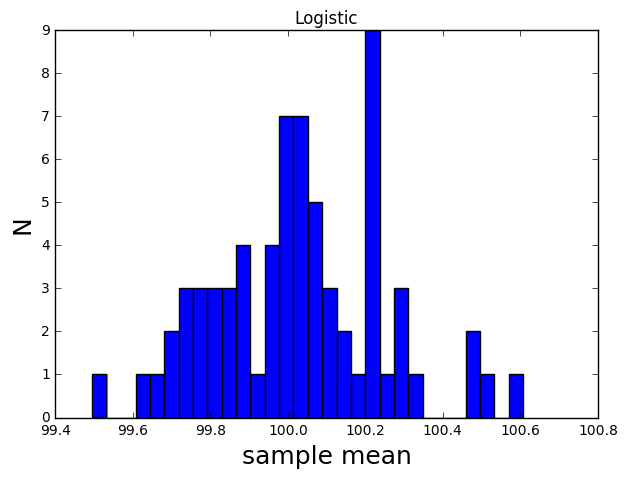

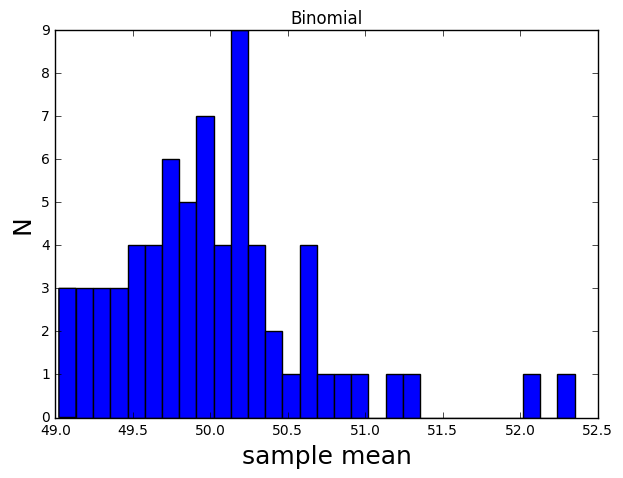

In [35]:
# Plotting individually
for dist in distributions:
    allmeans = list(md[dist]['means'].values())

    pl.figure(figsize=(7, 5))
    pl.hist(allmeans,bins=30)
    pl.title(dist)
    pl.xlabel('sample mean', fontsize = 18)
    pl.ylabel('N', fontsize = 18)